<a href="https://colab.research.google.com/github/NickKondis/Cat_Dog_Colab/blob/main/CNN_Image_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A feed forward nueral network sends information in the forward direction.  The problems with this type of network are:

1. Loss of neighborhood information

2. There are a lot of parameters to optimize

3. They are not translational invariants

In convulution neural networks, the input image is enhnaced before processing by manipulating the pixels.

In grayscale images, the image is represented by intensities between 0 and 255.

In color images, the image is represented by each pixel identified by 3 numbers, RGB.  This creates a multidimansional array.

In [ ]:
!wget https://www.dropbox.com/s/h16vq9rab1itifs/CatDog.zip

--2024-03-31 07:19:15--  https://www.dropbox.com/s/h16vq9rab1itifs/CatDog.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.83.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.83.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/h16vq9rab1itifs/CatDog.zip [following]
--2024-03-31 07:19:16--  https://www.dropbox.com/s/raw/h16vq9rab1itifs/CatDog.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb63bf05908157fb9707e3a9030.dl.dropboxusercontent.com/cd/0/inline/CQFM-tn4uUyiX7XdTAGclunmU8cOKF_HVKtUpLrjhQNKP6T_UfzkPRzt8q88J3n0T440pTqAeJDzcIXs3xdYrt5i08WJIX6JM8q0wijbdnS36PwhDCczwOMFcOFaVgY8wlJzoHBNWSInj-L5ke0LZgQu/file# [following]
--2024-03-31 07:19:16--  https://ucb63bf05908157fb9707e3a9030.dl.dropboxusercontent.com/cd/0/inline/CQFM-tn4uUyiX7XdTAGclunmU8cOKF_HVKtUpLrjhQNKP6T_UfzkPRzt8q88J3n0T440pTqAeJDzcIXs3xdYrt5i08WJIX6JM8q0wijbdn

In [ ]:
!unzip CatDog.zip
!rm CatDog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [ ]:
#!pip install keras

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, MaxPool2D, Input, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir = "/content/training_set/training_set"







In [ ]:
# Counting the number of images
d = {"dogs":0, "cats":0}

for dir in os.listdir(train_dir):
  path = os.path.join(train_dir, dir)
  d[dir] = len(os.listdir(path))
print(d)

{'dogs': 4006, 'cats': 4001}


In [ ]:
train_dir = "/content/training_set/training_set"

In [ ]:
# Because the images are .jpgs, we need to view the with skimage
from skimage.io import imread, imshow


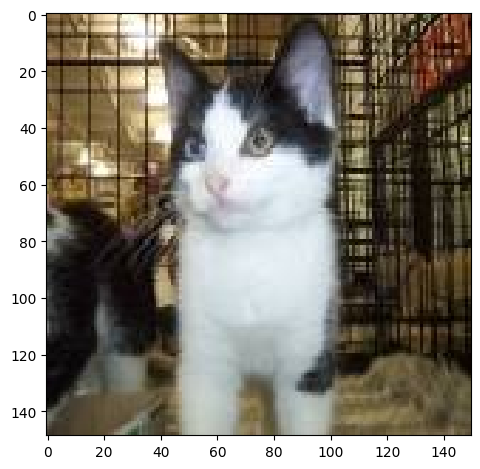

In [ ]:
imshow("/content/training_set/training_set/cats/cat.1000.jpg")

In [ ]:
!mkdir -p /content/data_dir/train/cats
!mkdir -p /content/data_dir/train/dogs
!mkdir -p /content/data_dir/test/test

In [ ]:
import os
import random
import shutil

# Define the directories containing the data
test_set_dir = '/content/test_set/test_set'
training_set_dir = '/content/training_set/training_set'

# Define the directory structure for train, test, and validation sets
data_dir = '/content/data_dir/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')

# Create directories if they don't exist
for directory in [train_dir, test_dir, val_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the percentage split
train_percentage = 0.8
test_percentage = 0.1
val_percentage = 0.1

# Function to split data into train, test, and validation sets
def split_data(class_dir, class_name):
    filenames = os.listdir(class_dir)
    random.shuffle(filenames)

    train_count = int(len(filenames) * train_percentage)
    test_count = int(len(filenames) * test_percentage)
    val_count = len(filenames) - train_count - test_count

    train_files = filenames[:train_count]
    test_files = filenames[train_count:train_count + test_count]
    val_files = filenames[train_count + test_count:]

    # Create destination directories if they don't exist
    for directory in [os.path.join(train_dir, class_name),
                      os.path.join(test_dir, class_name),
                      os.path.join(val_dir, class_name)]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Copy files to train directory
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dest = os.path.join(train_dir, class_name, filename)
        shutil.copy(src, dest)

    # Copy files to test directory
    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dest = os.path.join(test_dir, class_name, filename)
        shutil.copy(src, dest)

    # Copy files to validation directory
    for filename in val_files:
        src = os.path.join(class_dir, filename)
        dest = os.path.join(val_dir, class_name, filename)
        shutil.copy(src, dest)

# Split data for cats in the training set
split_data(os.path.join(training_set_dir, 'cats'), 'cats')

# Split data for dogs in the training set
split_data(os.path.join(training_set_dir, 'dogs'), 'dogs')

# Split data for cats in the test set
split_data(os.path.join(test_set_dir, 'cats'), 'cats')

# Split data for dogs in the test set
split_data(os.path.join(test_set_dir, 'dogs'), 'dogs')

print("Data split and copied successfully!")


Data split and copied successfully!


In [ ]:
import os
import random
import shutil

In [ ]:
# Next, we will preprocess the data
traindatagenerator = ImageDataGenerator(rescale = 1.0/255, rotation_range=0.3,
                                        zoom_range = 0.2, horizontal_flip = True,
                                        vertical_flip = True)
train_data = traindatagenerator.flow_from_directory(
    directory = '/content/data_dir/train',
    class_mode = 'binary', target_size = (224,224))

# This is unnecessary
# valdatagenerator = ImageDataGenerator(rescale = 1.0/255, rotation_range=0.3,
#                                         zoom_range = 0.2, horizontal_flip = True,
#                                         vertical_flip = True)

# Instead, simplify the test and val
valdatagenerator = ImageDataGenerator(rescale = 1.0/255)

val_data = traindatagenerator.flow_from_directory(
    directory = '/content/data_dir/val',
    class_mode = 'binary', target_size = (224,224))

# testdatagenerator = ImageDataGenerator(rescale = 1.0/255, rotation_range=0.3,
#                                         zoom_range = 0.2, horizontal_flip = True,
#                                         vertical_flip = True)

testdatagenerator = ImageDataGenerator(rescale = 1.0/255)
test_data = traindatagenerator.flow_from_directory(
    directory = '/content/data_dir/test',
    class_mode = 'binary', target_size = (224,224))
# Load in batches




Found 8020 images belonging to 2 classes.
Found 1007 images belonging to 2 classes.
Found 1001 images belonging to 3 classes.


In [ ]:
# See the labels

train_data.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
CLASS_ID = {j:i for i,j in train_data.class_indices.items()}

In [ ]:
CLASS_ID

{0: 'cats', 1: 'dogs'}

In [ ]:
# Now the data is ready

# We will now build a model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3),
                 activation = 'relu', input_shape = (224, 224, 3)))
model.add(Conv2D(filters = 16, kernel_size = (3, 3),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))# stride is by default = 2

model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

# Because I am not using any padding, each filter reduces the dimensions by one
# Increasing the filters is to compensate

model.add(Conv2D(filters = 128, kernel_size = (3, 3),
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Dropout(rate = 0.4))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))

model.add(Dropout(rate = 0.4))

model.add(Dense(units = 1, activation = 'sigmoid'))





In [ ]:
# View the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 64)        1

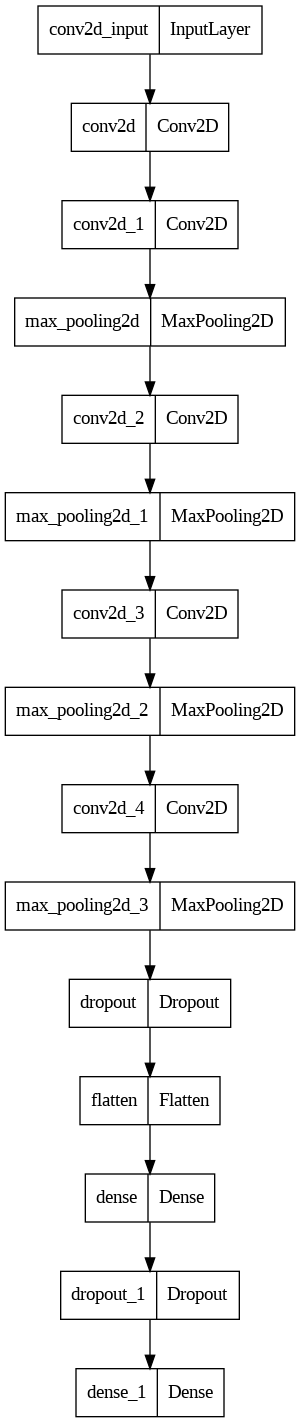

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# Now we compile the model

model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
# Callback, activity done at the end of each epoch
# Some useful callbacks are:
# ModelCheckpoint, which saves the current weights
#          in case something goes wrong in processing the model
# EarlyStopping, which stops the epochs if the model is not improving
# ModelCheckpoint, which saves the model weights at some frquency
# CSVLogger, which streams epoch results to a csv file

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5,
                   verbose = 1, mode = 'auto')
# This means watch the val_accuracy not improving by 0.01 after 5 epochs
# Verbose means display the print results

mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy',
                     verbose = 1, save_best_only = True, mode = 'auto')
# This saves the stored checkpoint file as best_model.h

# Save the callbacks
callback = [es, mc]

# Fit the model

hist = model.fit(train_data,
                 validation_data = val_data,
                 validation_steps = 16,
                 steps_per_epoch = 32,
                 epochs = 30,
                 verbose = 1,
                 callbacks = callback)








Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.5137
Epoch 1: val_accuracy improved from -inf to 0.52734, saving model to best_model.h5
32/32 [==============================] - 127s 4s/step - loss: 0.6959 - accuracy: 0.5137 - val_loss: 0.6926 - val_accuracy: 0.5273


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.5371
Epoch 2: val_accuracy improved from 0.52734 to 0.65039, saving model to best_model.h5
32/32 [==============================] - 122s 4s/step - loss: 0.6897 - accuracy: 0.5371 - val_loss: 0.6747 - val_accuracy: 0.6504
Epoch 3/30
32/32 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.5635
Epoch 3: val_accuracy did not improve from 0.65039
32/32 [==============================] - 122s 4s/step - loss: 0.6860 - accuracy: 0.5635 - val_loss: 0.6731 - val_accuracy: 0.5156
Epoch 4/30
32/32 [==============================] - ETA: 0s - loss: 0.6630 - accuracy: 0.5977
Epoch 4: val_accuracy improved from 0.65039 to 0.67383, saving model to best_model.h5
32/32 [==============================] - 129s 4s/step - loss: 0.6630 - accuracy: 0.5977 - val_loss: 0.6246 - val_accuracy: 0.6738
Epoch 5/30
32/32 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.5938
Epoch 5: va

In [ ]:
# Save the final model

from tensorflow.keras.models import load_model

final_model = load_model('best_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
final_model.evaluate(test_data)


32/32 [==============================] - 39s 1s/step - loss: 0.6353 - accuracy: 0.6593


[0.6353011131286621, 0.6593406796455383]

In [ ]:
# Transfer Learning

# This means using/importing pre-trained models

# For we will be using the VGG16 model, which has 1000 output neurons

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg = VGG16(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

vgg.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# See the congiguration

vgg.get_config()

{'name': 'vgg16',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regu

In [ ]:
# We will switch off the layers and add some new layers

for layer in vgg.layers[:15]:
  layer.trainable = False

for layer in vgg.layers[15:]:
  layer.trainable = True

# This only keeps the first 15 layers


In [ ]:
# Get the last layer
final_layer = vgg.layers[-1]


In [ ]:
x = Flatten() (final_layer.output)
x = Dense(512, activation = 'relu') (x)
x = Dropout(0.3)(x)
x = Dense(1, activation = 'sigmoid')(x)


In [ ]:
from tensorflow.keras.models import Model

transfer_model = Model(vgg.input, x)
# This creates a transfer model


In [ ]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Because there are 20 million parameters (too many)
# we will reduce them

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool2D

x = GlobalMaxPool2D() (final_layer.output)
x = Dense(512, activation = 'relu') (x)
x = Dropout(0.3)(x)
x = Dense(1, activation = 'sigmoid')(x)

transfer_model = Model(vgg.input, x)



In [ ]:
transfer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
transfer_model.compile(loss = 'binary_crossentropy',
                       optimizer = tf.optimizers.SGD(learning_rate=0.0001, momentum = 0.9),
                       metrics = ['accuracy'])
#Note, I am specifying the parameters of SGD instead of the default 'SGD'


In [ ]:
hist = transfer_model.fit(train_data,
                 validation_data = val_data,
                 validation_steps = 16,
                 steps_per_epoch = 16,
                 epochs = 10,
                 verbose = 1,
                 callbacks = callback)

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.8347 - accuracy: 0.4805 
Epoch 1: val_accuracy did not improve from 0.67383
16/16 [==============================] - 701s 45s/step - loss: 0.8347 - accuracy: 0.4805 - val_loss: 0.7512 - val_accuracy: 0.4453
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.4688 
Epoch 2: val_accuracy did not improve from 0.67383
16/16 [==============================] - 701s 45s/step - loss: 0.7856 - accuracy: 0.4688 - val_loss: 0.7108 - val_accuracy: 0.4668
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.7411 - accuracy: 0.5137 
Epoch 3: val_accuracy did not improve from 0.67383
16/16 [==============================] - 705s 45s/step - loss: 0.7411 - accuracy: 0.5137 - val_loss: 0.6838 - val_accuracy: 0.5293
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 0.7239 - accuracy: 0.5703 
Epoch 4: val_accuracy did not improve from 0.67383
16/16 [================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-0417b245ca6e>", line 1, in <cell line: 1>
    hist = transfer_model.fit(train_data,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit
    val_logs = self.evaluate(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate
    logs = test_function_runner.run_step(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step
    tmp_logs = self._function(dataset_

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Testing the model on an image

#best_model = load_model('best_model.h5')

from tensorflow.keras.utils import load_img, img_to_array
# from tensorflow.keras.models import

#!wget (put url or file location here)
!wget https://www.dropbox.com/s/urnijmcw3ya66o6/test%20dog.jpg

pil = load_img('test dog.jpg', target_size = (224,224))

# Convert to an array
image = img_to_array(pil)
image = image/255.0

plt.imshow(image)
plt.title("My Input Image")
plt.show()

print("*********************************")

image = np.expand_dims(image, axis = 0)

pred = int(model.predict(image) > 0.5)

print(f"Prediction from the model is :{CLASS_ID[pred]}")


--2024-03-31 09:02:46--  https://www.dropbox.com/s/urnijmcw3ya66o6/test%20dog.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test dog.jpg’

test dog.jpg            [ <=>                ]  57.47K  --.-KB/s    in 0.07s   

2024-03-31 09:02:46 (779 KB/s) - ‘test dog.jpg’ saved [58848]



UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x79644add5a30>